# Linear Regression using SciKit-Learn
----
In the previous tutorial, we learnt how to fit a regression line using the method of least squares.   
   
In this tutorial, you will be introduced to a very useful Python library called scikit-learn. This library contains many functions which are designed to make machine learning quick and easy for Python programmers.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

**Next** we will load our data as a Pandas DataFrames.   

In [2]:
df = pd.read_csv('data_1.csv', index_col=0)
df.head(5)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


**Let's plot** the ZAR/USD exchange rate and the value of exports over time

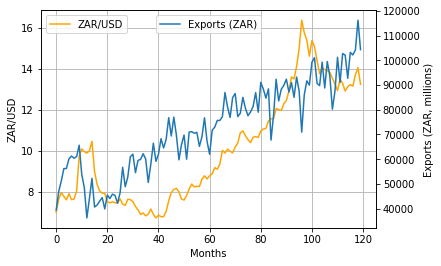

In [9]:
y = df['ZAR/USD'].values
X = df.drop('ZAR/USD', axis=1).values

rc('mathtext', default='regular')
# create blank figure
fig = plt.figure()

# split figure to allow two sets of y axes
ax = fig.add_subplot(111)

# plot the first line on its axis
ax.plot(np.arange(len(y)), y, '-', label = 'ZAR/USD', color='orange')

# create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(X)), X, '-', label = 'Exports (ZAR)')

# add legends for each axis
ax.legend(loc=0)
ax2.legend(loc=9)

ax.grid()

# set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()

Above we can see the ZAR/USD exchange rate over a period of 120 months, starting in 2008.   

## Let's try to predict the Rand exchange rate   

Now, let's see what we can do with sk-learn.   

We'll start by loading the LinearRegression library.

In [4]:
from sklearn.linear_model import LinearRegression

We can take a peak under the hood by using the Python help (`?`) function. This returns the documentation of the required parameters and the attributes of any function or object.   

We're going to need to create a `LinearRegression()` object, so let's first take a look at the documentation for that object:

In [6]:
?LinearRegression

### Fitting the linear model
We will create a `LinearRegression()` object with all the default parameters.

In [5]:
lm = LinearRegression()

With the object created, we will then need to fit the model to our data. This is done using the `lm.fit()` command.

In [0]:
?lm.fit()

We can see that the `lm.fit()` command requires two parameters (`X` and `y`), with an optional third parameter, `sample_weight`.   

The `sample_weight` parameter would be useful in situations where the observations in our data have unequal errors - think weight vs height of university students where some students were weighed with an older analogue scale and others were weighed with a new digital scale.   

We have no reason to believe that any of our data is any more, or any less trustworthy so we'll leave out the optional weights parameter

In [10]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
b = float(lm.intercept_)

In [12]:
a = lm.coef_

In [28]:
print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 [0.00011351]
Intercept:	 1.844811467042648


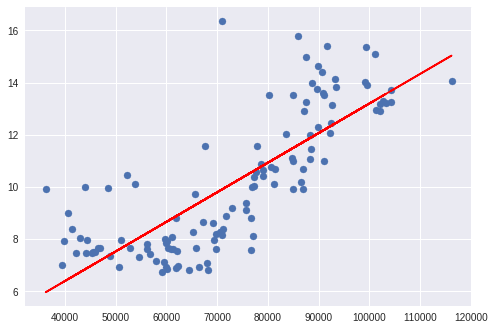

In [29]:
# generate values of y from x, using the linear model
gen_y = lm.predict(X)

# plot the results
plt.scatter(X, y)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.show()

## Assessing the model accuracy
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [30]:
print("Residual sum of squares:", ((lm.predict(X) - y) ** 2).sum())

Residual sum of squares: 321.4571665525765


### sk-learn metrics
There is another Python library which will make things easier for us to assess the fit of our model.   
   
In addition to RSS, there are some other metrics we can use:

**Mean Squared Error:**
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared:**
$$R^2 = 1 - \frac{RSS}{TSS}$$   
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

In [0]:
from sklearn import metrics

In [32]:
fit_lm = lm.predict(X)

print('MSE:', metrics.mean_squared_error(y, fit_lm))

MSE: 2.6788097212714708


In [33]:
print('R_squared:', metrics.r2_score(y, fit_lm))

R_squared: 0.6158417476896207


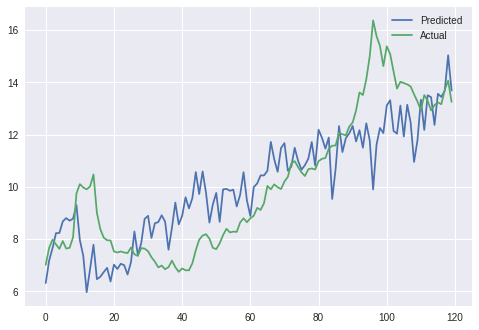

In [34]:
plt.plot(np.arange(len(X)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(y)), y, label='Actual')
plt.legend()
plt.show()

----
So our first model is not too great! The general trend is there, but we have missed a lot of the seasonal variability in the exchange rate.

**To summarise:**   
We learnt how to:
* use scikit-learn to perform ordinary least squares regression.   
* use scikit-learn to assess model performance using metrics such as $MSE$ and $R^2$.   

In future tutorials, we will look at methods for improving the predictive accuracy of our model.